In [ ]:
#!pip install openpyxl
#!pip install seaborn

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

import gc #garbage collector

In [4]:
#Compare the 2 datasets we have

cobify1 = pd.read_csv("data/measurements.csv")
display(cobify1.head())
cobify2 = pd.read_excel("data/measurements2.xlsx")
display(cobify2.head())

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [5]:
display(cobify1.shape, cobify2.shape)

(388, 12)

(388, 12)

In [6]:
display(cobify1.dtypes, cobify2.dtypes)

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [7]:
#Since the second dataset has the same data but the types need less modifications, I will use the second

del cobify1
gc.collect()

522

### Exploratory Data Analysis

In [8]:
cobify2.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [9]:
display(f"temp_inside: {cobify2['temp_inside'].unique()}") #Maybe is not relevant, could try without the NAN lines and compare
display(f"specials: {cobify2['specials'].unique()}") #Need to see if the next columns are the dummified
display(f"specials: {cobify2['AC'].unique()}")
display(f"specials: {cobify2['rain'].unique()}")
display(f"specials: {cobify2['sun'].unique()}")
display(f"gas type: {cobify2['gas_type'].unique()}") 
display(f"refill liters: {cobify2['refill liters'].unique()}") #As we have the mean consume, this would not be relevant today
display(f"regill gas: {cobify2['refill gas'].unique()}") #need to see if occurs any changing of gas type when refill

'temp_inside: [21.5 22.5 20.   nan 21.  20.5 23.  23.5 25.  24.  22.  19.  24.5 25.5]'

"specials: [nan 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'\n 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain']"

'specials: [0 1]'

'specials: [0 1]'

'specials: [0 1]'

"gas type: ['E10' 'SP98']"

'refill liters: [45.   nan 37.6 37.7 38.  38.3 10.  39.  41.  37.  37.2]'

"regill gas: ['E10' nan 'SP98']"

In [10]:
cobify2[cobify2['specials'].isna()==False][['specials','AC','rain','sun']].sample(50)

,specials,AC,rain,sun
273,AC sun,1,0,1
41,AC,1,0,0
344,ac rain,1,1,0
331,AC Sun,1,0,1
139,rain,0,1,0
387,AC,1,0,0
59,rain,0,1,0
204,AC rain,1,1,0
277,AC rain,1,1,0
104,AC rain,1,1,0


## Cleaning

In [11]:
#we can drop 'specials' as was dummyfied in the next 3 columns (snow as rain too)

cobify2.drop(columns='specials', inplace=True)

In [12]:
display(cobify2.isna().sum())
display(cobify2['temp_inside'].isna().sum()/len(cobify2['temp_inside'])*100)
display(cobify2['refill liters'].isna().sum()/len(cobify2['refill liters'])*100)
display(cobify2['refill gas'].isna().sum()/len(cobify2['refill gas'])*100)


distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

3.0927835051546393

96.64948453608247

96.64948453608247

In [13]:
#Since the NAN values are very low in temp_inside and very high in the refill columns, I will drop the lines on temp_inside and the columns of refill

cobify2.dropna(subset=['temp_inside'], inplace=True)
cobify2.drop(columns=['refill liters','refill gas'], inplace=True)
display(cobify2.isna().sum())
display(cobify2.shape)

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

(376, 9)

## Calculating costs
- Exploring the dataset in Kaggle, there is a picture with the prices of the gas types, so I will use it, knowning that the fuel prices change almost everyday:
    - E10: 1.379
    - SP98: 1.459
- Comsumption is liters per 100 km so if we have a comsumption of 5 and we drive a distance of 50km, the liters of the trip are 2.5 [(50/100)*5]



In [18]:
gas_E10 = 1.379
gas_SP98 = 1.459

cobify = cobify2.copy()
cobify['gas_price'] = np.where(cobify['gas_type']=='E10',gas_E10,gas_SP98)
cobify['liters_trip'] = (cobify2['distance']/100)*cobify2['consume']
cobify['trip_cost'] = cobify['liters_trip']*cobify['gas_price']
cobify['km_cost'] = cobify['trip_cost']/cobify['distance']

display(cobify.sample(10))

#Means of cost of km and consume

display(cobify.groupby('gas_type').agg({'km_cost':'mean','consume':'mean'}).reset_index().rename(columns={'consume':'mean consume'}))




,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_price,liters_trip,trip_cost,km_cost
69,11.8,4.5,37,21.5,4,SP98,1,0,0,1.459,0.5310,0.774729,0.065655
41,4.5,5.0,29,21.5,7,E10,1,0,0,1.379,0.2250,0.310275,0.068950
226,31.4,4.6,62,22.5,11,SP98,0,0,0,1.459,1.4444,2.107380,0.067114
325,16.6,3.7,49,22.0,17,E10,0,0,0,1.379,0.6142,0.846982,0.051023
300,36.5,3.9,54,23.0,18,SP98,0,0,1,1.459,1.4235,2.076887,0.056901
334,129.7,4.6,58,24.0,21,E10,0,0,0,1.379,5.9662,8.227390,0.063434
342,15.4,3.8,47,22.0,24,E10,0,0,0,1.379,0.5852,0.806991,0.052402
332,4.8,4.7,26,25.0,18,E10,0,0,0,1.379,0.2256,0.311102,0.064813
90,11.8,4.3,37,20.0,6,SP98,0,0,0,1.459,0.5074,0.740297,0.062737
15,17.3,5.1,24,21.5,5,E10,0,0,0,1.379,0.8823,1.216692,0.070329


,gas_type,km_cost,mean consume
0,E10,0.068274,4.950955
1,SP98,0.071591,4.906849


As we can see, with a similar consume, the E10 had a lower cost per km, in a real situation, my car for example can run 800km with the full tank, so I would save:

- 0.068274 * 800 = 54.6192
- 0.071591 * 800 = 57.2728

Saving in one full tank: 2.6536 €

## Visualizations

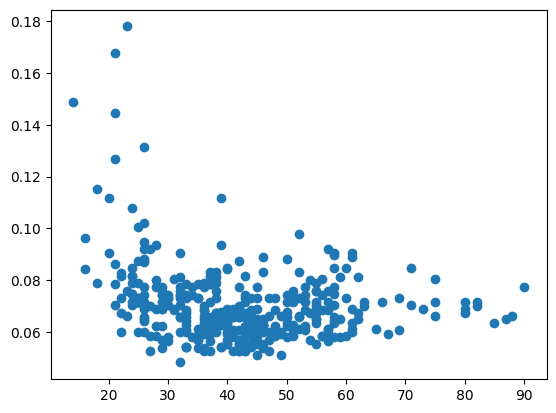

In [26]:
#speed vs km_cost

plt.scatter(cobify['speed'],cobify['km_cost'])

Speed seems has a little relevance, will see in the correlation

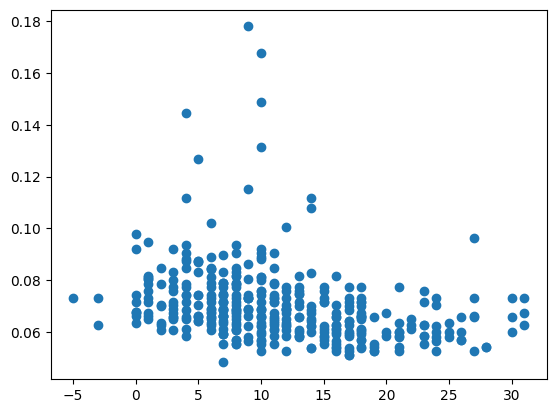

In [36]:
#temp_outside vs km_cost

plt.scatter(cobify['temp_outside'],cobify['km_cost'])


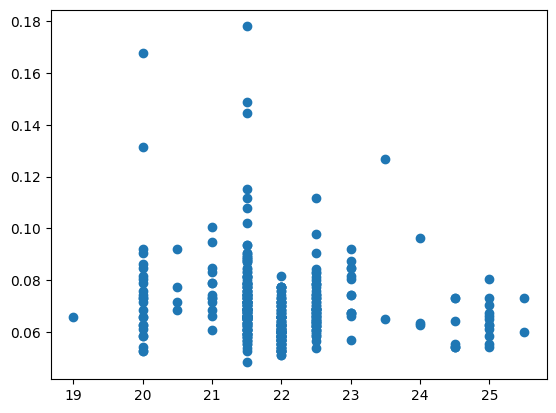

In [35]:
#temp_inside vs km_cost

plt.scatter(cobify['temp_inside'],cobify['km_cost'])

Temperatures doesn't seems to have many relevance

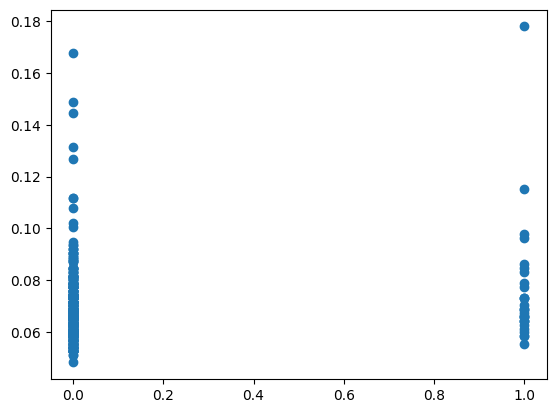

In [40]:
#AC vs km_cost

plt.scatter(cobify['AC'],cobify['km_cost'])

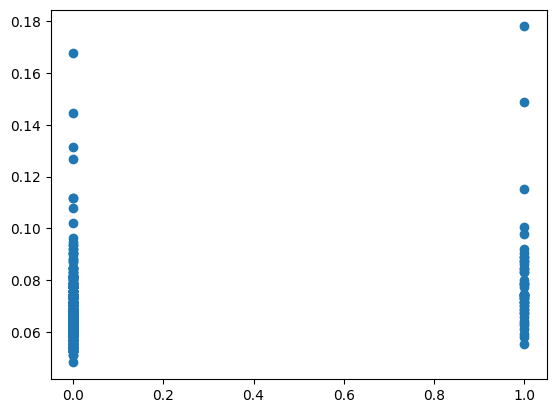

In [41]:
#rain vs km_cost

plt.scatter(cobify['rain'],cobify['km_cost'])

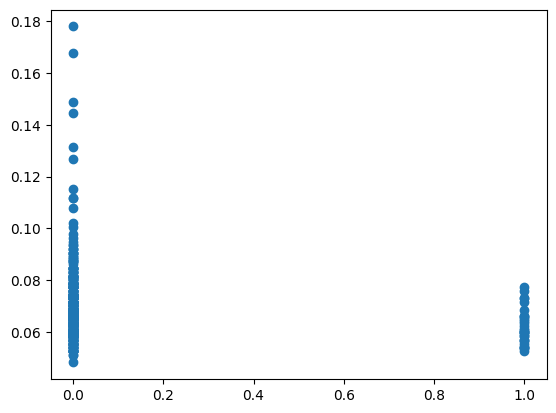

In [42]:
#Sun vs km_cost

plt.scatter(cobify['sun'],cobify['km_cost'])

Sunny days seemed to have less consume.
AC turned on, could make the car consume more.

## Prediction of cost_km




,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_price,liters_trip,trip_cost,km_cost
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,0.047877,-0.027670,-0.022129,0.078627,-0.047877,0.992271,0.990970,-0.135967
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.020928,0.093892,0.247699,-0.169173,-0.020928,-0.056157,-0.056011,0.991202
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,0.099495,-0.036351,-0.002936,0.077181,-0.099495,0.554691,0.549062,-0.245135
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,-0.010340,0.297775,-0.037356,0.246120,0.010340,0.062473,0.061907,-0.161530
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,-0.156990,0.169374,-0.185731,0.349988,0.156990,0.037425,0.040019,-0.296167
gas_type,0.047877,0.020928,0.099495,-0.010340,-0.156990,1.000000,-0.109996,-0.059112,-0.038120,-1.000000,0.051455,0.027714,-0.109082
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,-0.109996,1.000000,0.244848,0.090164,0.109996,-0.020951,-0.019447,0.108661
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,-0.059112,0.244848,1.000000,-0.113298,0.059112,0.006391,0.008833,0.253692
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,-0.038120,0.090164,-0.113298,1.000000,0.038120,0.062970,0.064834,-0.163373
gas_price,-0.047877,-0.020928,-0.099495,0.010340,0.156990,-1.000000,0.109996,0.059112,0.038120,1.000000,-0.051455,-0.027714,0.109082


<AxesSubplot: >

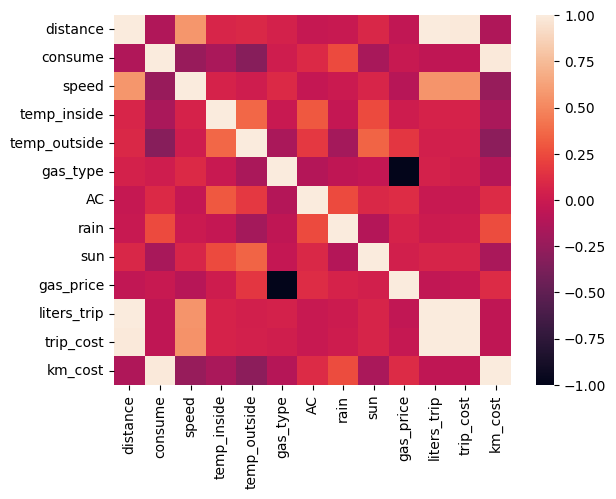

In [49]:
#Encoding gas types

cobify['gas_type'] = cobify['gas_type'].apply(lambda x: 1 if x == 'E10' else 0)

display(cobify.corr())
sns.heatmap(cobify.corr())


In [50]:


#I will take those that are correlated but no strongest (>0.90)

X = cobify[['rain','AC','sun', 'gas_type', 'temp_outside', 'temp_inside','speed','distance']]
y = cobify['km_cost']


### Linear Regression

In [53]:
#Spliting in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

model = LinearRegression().fit(X_train, y_train)

# Predicting the cost
y_pred = model.predict(X_test)

#Evaluating the model with R²
display(f'R²: {r2_score(y_test, y_pred)}')


'R^2: 0.17764784874099748'

very poor the prediction with Lineas Regression. Need to try with another

### Gradient boosting regression

In [55]:
model = GradientBoostingRegressor(max_depth=3, n_estimators=100, random_state=3)
model.fit(X_train, y_train)

# Predicting the cost
y_pred = model.predict(X_test)

#Evaluating the model with R²
display(f'R²: {r2_score(y_test, y_pred)}')

'R²: 0.6665053816838683'

In [56]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=3)
model.fit(X_train, y_train)

# Predicting the cost
y_pred = model.predict(X_test)

#Evaluating the model with R²
display(f'R²: {r2_score(y_test, y_pred)}')

'R²: 0.7615668482650608'

In [57]:
model = GradientBoostingRegressor(max_depth=10, n_estimators=100, random_state=3)
model.fit(X_train, y_train)

# Predicting the cost
y_pred = model.predict(X_test)

#Evaluating the model with R²
display(f'R²: {r2_score(y_test, y_pred)}')

'R²: 0.7257331795527537'

This algoryhtm much better, with a max_depth = 5 got the best results, but would be necessary to keep trying other options to get a better score.